# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2022

## Project 1 - The Trapped Knight
Due Friday, February 11

### Description

In this project, you will write a computer code to generate a particular sequence of numbers described in the following YouTube video: [The Trapped Knight](https://www.youtube.com/watch?v=RGQe8waGJ4w)

Begin by watching the video and make sure you understand exactly how the sequence is generated. Then continue to implement the code in the 3 parts described below.

### Part 1 - Initialize the board

We will store the chess board in a 2d-array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```julia
board = initialize_board(3)
```
the correct output is
```julia
7×7 Matrix{Int64}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Julia uses 1-based indexing, the center square of the array `board` is given by element `board[n+1,n+1]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.
- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [1]:
# Initializes the board on a [-n:n]x[-n:n] domain with spiral numbers
#
# Example: initialize_board(2) returns
# 17 16 15 14 13
# 18  5  4  3 12
# 19  6  1  2 11
# 20  7  8  9 10
# 21 22 23 24 25
#
# Inputs:
#  n     = integer size of board to allocate
# Outputs: 
#  board = 2n+1 x 2n+1 integer array filled with spiral numbers
function initialize_board(n)
    # some helper functions to move the coordinates
    move_up = (x,y) -> (x-1, y)
    move_down = (x,y) -> (x+1, y)
    move_left = (x,y) -> (x, y-1)
    move_right = (x,y) -> (x, y+1)
    # starting from the center of the board, we need to move in a spiral
    # so the steps goes right, up, left, left, down, down, right * 3, ...
    # the direction is right, up, left, down
    action_loop = [move_right, move_up, move_left, move_down]
    # the step size changes every two turns, starting from 1 step
    action_time = 1
    
    # the result is a 2D matrix of size 2n+1 x 2n+1
    result = zeros(Int32, 2*n+1, 2*n+1)
    # start filling the matrix from center
    current = 1
    x = n + 1
    y = n + 1
    step = 0
    directions = 1
    result[x,y] = current
    
    # start moving in spiral

    while current < (2*n+1) * (2*n+1)
        # move in the current direction, for action_time steps
        for i in 1:action_time
            # move in the current direction
            x,y = action_loop[directions](x,y)
            # if we are still in the board, fill the cell
            current += 1
            if current > (2*n+1) * (2*n+1)
                break
            end
            result[x,y] = current
        end
        # change direction
        directions += 1
        # if we are done travelling down, then go to right again
        if directions == 5
            directions = 1
        end
        # increase the step size, 0.5 because the directions change happens every two turns
        action_time += 0.5
    end
    return result
end

board = initialize_board(2);
board

5×5 Matrix{Int32}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

In [2]:
board = initialize_board(5);
board

11×11 Matrix{Int32}:
 101  100   99   98   97   96   95   94   93   92   91
 102   65   64   63   62   61   60   59   58   57   90
 103   66   37   36   35   34   33   32   31   56   89
 104   67   38   17   16   15   14   13   30   55   88
 105   68   39   18    5    4    3   12   29   54   87
 106   69   40   19    6    1    2   11   28   53   86
 107   70   41   20    7    8    9   10   27   52   85
 108   71   42   21   22   23   24   25   26   51   84
 109   72   43   44   45   46   47   48   49   50   83
 110   73   74   75   76   77   78   79   80   81   82
 111  112  113  114  115  116  117  118  119  120  121

In [3]:
board = initialize_board(1);
board

3×3 Matrix{Int32}:
 5  4  3
 6  1  2
 7  8  9

### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Matrix{Int64}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

In [4]:
board = initialize_board(2);
board

5×5 Matrix{Int32}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

In [5]:
# Simulates the trapped knight walk on a pre-initialized board and returns information about knight walk.
# 
# Inputs: 
#  board    = 2n+1 x 2n+1 integer array filled with spiral numbers
# Outputs: 
#  sequence = integer array containing the sequence of spiral numbers the knight jumped to during walk
#  x_path   = integer array containing the x coordinates of each step of knight walk
#  y_path   = integer array containing the y coordinates of each step of knight walk

function simulate_walk(board)

    # the helper function to find the smallest unvisited neighbor that a knight jump can go to
    function possible_jumps(board, x, y, values_avoid)
        # knight jump moves are:
        jumps = [
            (2, 1), (2, -1), (-2, 1), (-2, -1),
            (1, 2), (1, -2), (-1, 2), (-1, -2)
        ]
        # to find the smallest value, we check the possible jumps one by one
        smallest_value_seemed = 100000000
        smallest_jump_x = -100
        smallest_jump_y = -100
        for (tx, ty) in jumps
            # don't let the jump go outside the board
            if x+tx < 1 || y+ty < 1 || x+tx > total_height || y+ty > total_height
                continue
            end
            # don't jump to a visited value, then check for the smallest value possible
            if board[x+tx,y+ty] < smallest_value_seemed && !in(board[x+tx,y+ty], values_avoid)
                # found it
                smallest_value_seemed = board[x+tx,y+ty]
                smallest_jump_x = tx
                smallest_jump_y = ty
            end
        end
        # if smallest_jump_x is -100 (initial value), then no jumps found
        if smallest_jump_x == -100
            return -100, -100, -1
        end
        # return the smallest jump
        return smallest_jump_x, smallest_jump_y, smallest_value_seemed
    end

    sequence = [1] # it must start with 1
    total_height = size(board,1)
    n::Int32 = (total_height - 1) / 2
    x::Int32 = n + 1
    y::Int32 = n + 1
    x_path = [x - n - 1] # 0 centered on the board
    y_path = [y - n - 1] # 0 centered on the board

    # the main loop
    tx, ty, next_value = possible_jumps(board, x, y, sequence)
    while tx != -100
        # update the coordinates
        x += tx
        y += ty
        # update the lists to return
        push!(sequence, next_value)
        push!(x_path, x - n - 1)
        push!(y_path, y - n - 1)
        # keep jumping
        tx, ty, next_value = possible_jumps(board, x, y, sequence)
    end
    # the return sequence is reversed because the X, Y coordinates are reversed
    return sequence, y_path, x_path
end

simulate_walk (generic function with 1 method)

In [8]:
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)

5×5 Matrix{Int32}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]


### Part 3 - Generate the full sequence and plot the path

Finally, use your code to generate the full sequence ($n=100$ is sufficient), output the *last* number, and plot the path by straight lines between all the visited x,y-coordinates.

In [10]:
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)

5×5 Matrix{Int32}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]


Sequence ends with: 2084


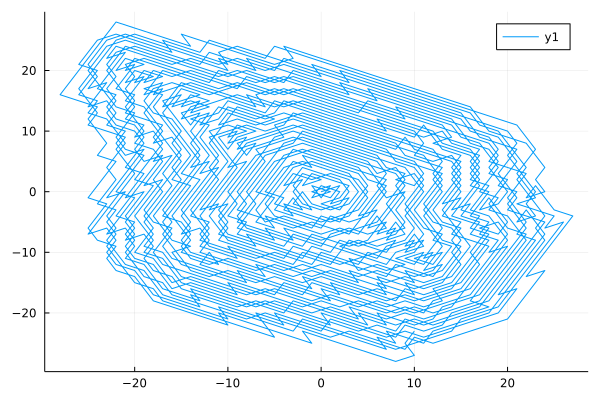

In [11]:
# now the full sequence

using Plots
big_board = initialize_board(100)
seq, xs, ys = simulate_walk(big_board);

println("Sequence ends with: ", seq[end])

# plot the walk
plot(xs, ys)
# png(fig, "knight_walk.png")